In [22]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys
sys.path.append("./Functions_2")

# Load the data

In [24]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [25]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [26]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    N = len(y)
    e = y - tx @ w
    return (0.5/N) * ( (e.T)@e )

# 2. Grid Search

Fill in the function `grid_search()` below:

In [27]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i,j] = compute_loss(y, tx, np.array([grid_w0[i],grid_w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.424483146781974, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.007 seconds


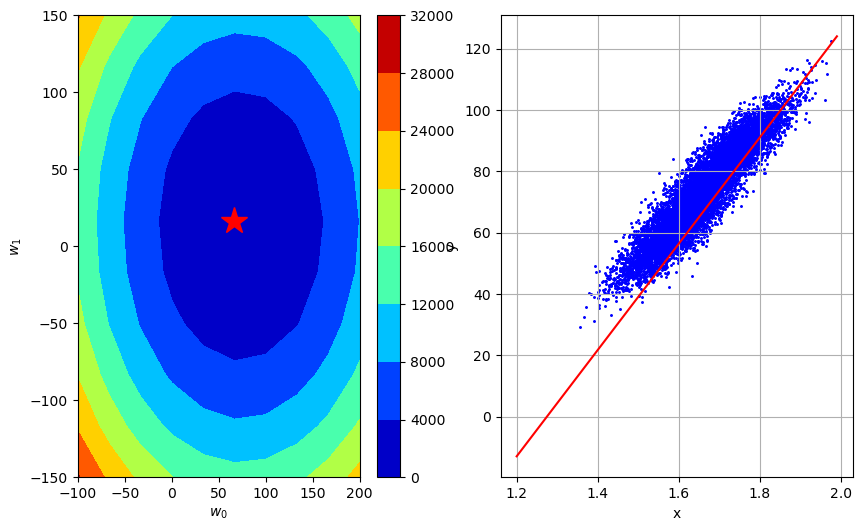

In [28]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

### Fine search (n = 50)

Grid Search: loss*=18.7935410195231, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.171 seconds


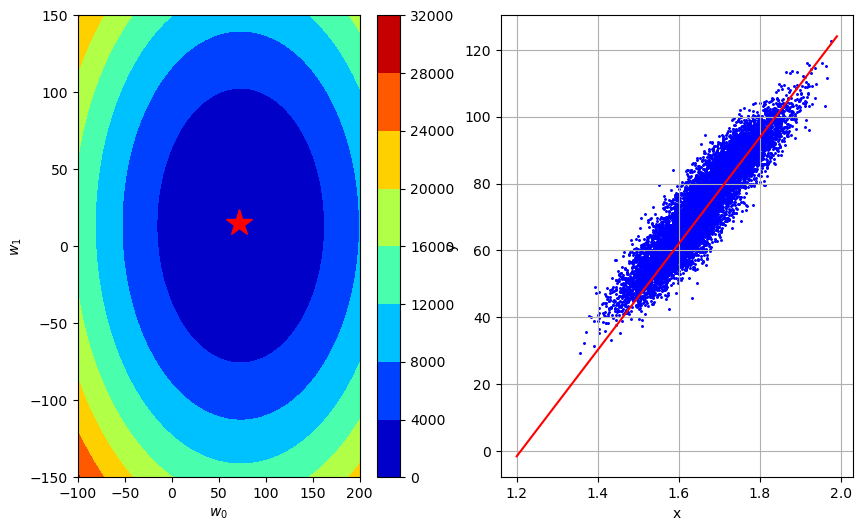

In [19]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [20]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    N = len(y)
    e = y - tx@w
    return (-1/N)*((tx.T)@e)

In [21]:
yyy = np.array([1,2,3])
xxx = np.array([[1,1],[1,5],[1,7]])
www = np.array([1,2])

if np.allclose(np.array([23/3,131/3]), compute_gradient(yyy, xxx, www)):
    print('All good !')
else:
    print('Big problem !')

All good !


### W = [100,20]

In [22]:
w = np.array([100,20])
print(f'Gradient : ∇L = {compute_gradient(y, tx, w)}')
print(f'Gradient norm : ║∇L║ = {np.linalg.norm(compute_gradient(y, tx, w))}')

Gradient : ∇L = [26.706078    6.52028757]
Gradient norm : ║∇L║ = 27.490521129292645


### W = [50,10]

In [23]:
w = np.array([50,10])
print(f'Gradient : ∇L = {compute_gradient(y, tx, w)}')
print(f'Gradient norm : ║∇L║ = {np.linalg.norm(compute_gradient(y, tx, w))}')

Gradient : ∇L = [-23.293922    -3.47971243]
Gradient norm : ║∇L║ = 23.552392678247678


Please fill in the functions `gradient_descent` below:

In [24]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w-gamma*grad

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [25]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591688, w0=51.305745401473324, w1=9.435798704492637
GD iter. 1/49: loss=265.30246210896445, w0=66.6974690219156, w1=12.26653831584019
GD iter. 2/49: loss=37.87837955044142, w0=71.31498610804826, w1=13.115760199244404
GD iter. 3/49: loss=17.410212120174496, w0=72.70024123388808, w1=13.370526764265659
GD iter. 4/49: loss=15.56807705145045, w0=73.11581777164002, w1=13.446956733772032
GD iter. 5/49: loss=15.40228489526529, w0=73.2404907329656, w1=13.469885724623945
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136326, w1=13.476764421879517
GD iter. 7/49: loss=15.386020684743528, w0=73.28911318788258, w1=13.478828031056189
GD iter. 8/49: loss=15.38589982226167, w0=73.29247935783836, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638298, w0=73.2934892088251, w1=13.47963283863509
GD iter. 10/49: loss=15.385887965652202, w0=73.29379216412111, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305070992, w1=13.479705271317192
G

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

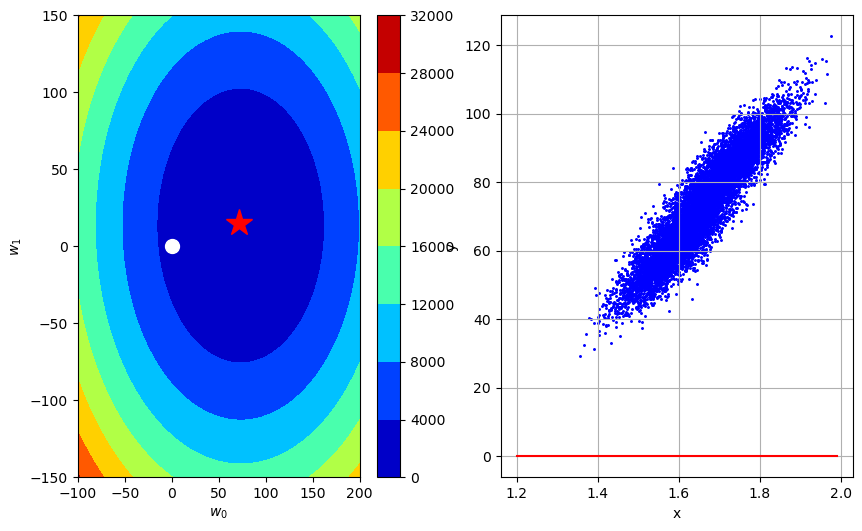

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

### Different value of γ

In [27]:
# Define the parameters of the algorithm.
gamme_list = [0.001, 0.01, 0.5, 1, 2, 2.5]
max_iters = 50

gamma = gamme_list[2]
print(f'γ = {gamma}')

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

γ = 0.5
GD iter. 0/49: loss=2792.2367127591688, w0=36.646961001052375, w1=6.739856217494741
GD iter. 1/49: loss=709.5985940914194, w0=54.970441501578755, w1=10.109784326241943
GD iter. 2/49: loss=188.93906442447673, w0=64.13218175184193, w1=11.794748380615529
GD iter. 3/49: loss=58.77418200774128, w0=68.71305187697352, w1=12.637230407802306
GD iter. 4/49: loss=26.232961403557375, w0=71.00348693953931, w1=13.058471421395689
GD iter. 5/49: loss=18.09765625251142, w0=72.14870447082222, w1=13.269091928192372
GD iter. 6/49: loss=16.063829964749896, w0=72.72131323646367, w1=13.374402181590714
GD iter. 7/49: loss=15.55537339280953, w0=73.0076176192844, w1=13.427057308289882
GD iter. 8/49: loss=15.42825924982444, w0=73.15076981069477, w1=13.453384871639466
GD iter. 9/49: loss=15.396480714078159, w0=73.22234590639995, w1=13.466548653314257
GD iter. 10/49: loss=15.388536080141584, w0=73.25813395425254, w1=13.473130544151653
GD iter. 11/49: loss=15.386549921657451, w0=73.27602797817883, w1=13.476

### Different value of initial weight

In [28]:
# Define the parameters of the algorithm.
weight_list = [np.array([0, 0]),np.array([100, 10]),np.array([-1000, 1000])]
max_iters = 50
gamma = 0.1

# Initialization
w_initial = weight_list[2]
print(f'w = {w_initial}')

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

w = [-1000  1000]
GD iter. 0/49: loss=1062606.4462798715, w0=-892.6706077997901, w1=901.3479712434987
GD iter. 1/49: loss=860714.1448053918, w0=-796.074154819601, w1=812.5611453626482
GD iter. 2/49: loss=697181.3806110631, w0=-709.1373471374304, w1=732.6530020698827
GD iter. 3/49: loss=564719.8416136565, w0=-630.8942202234771, w1=660.7356731063934
GD iter. 4/49: loss=457425.99502575694, w0=-560.4754060009192, w1=596.0100770392534
GD iter. 5/49: loss=370517.97928955866, w0=-497.0984732006169, w1=537.7570405788271
GD iter. 6/49: loss=300122.4865432377, w0=-440.05923368034496, w1=485.32930776444346
GD iter. 7/49: loss=243102.13741871793, w0=-388.72391811210036, w1=438.14434823149793
GD iter. 8/49: loss=196915.6546278567, w0=-342.52213410068, w1=395.6778846518473
GD iter. 9/49: loss=159504.60356725915, w0=-300.94052849040145, w1=357.4580674301616
GD iter. 10/49: loss=129201.65220817502, w0=-263.5170834411507, w1=323.0602319306443
GD iter. 11/49: loss=104656.26160731682, w0=-229.83598289682

# 4. Stochastic gradient descent

In [29]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    N = len(y)
    e = y - tx@w
    return (-1/N)*((tx.T)@e)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        loss = compute_loss(y,tx,w)
        batch = batch_iter(y, tx, batch_size=batch_size, num_batches=1, shuffle=True)
        for batch_y, batch_tx in batch:
            grad = compute_stoch_gradient(batch_y, batch_tx, w)
        w = w - gamma * grad

        ws.append(w)
        losses.append(loss)

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [30]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2792.2367127591688, w0=5.22897918105559, w1=-6.800351595865486
SGD iter. 1/49: loss=2537.444607032985, w0=11.939346415131256, w1=-6.30678940936073
SGD iter. 2/49: loss=2093.3306882159077, w0=19.54019560510627, w1=-1.8312409608058209
SGD iter. 3/49: loss=1577.3300855946397, w0=24.746770913192027, w1=-2.9626025310720276
SGD iter. 4/49: loss=1328.9736880152877, w0=27.35736904303355, w1=-5.878429830041693
SGD iter. 5/49: loss=1257.8381727262115, w0=29.06084408924045, w1=-8.106900368562686
SGD iter. 6/49: loss=1226.659404856843, w0=30.659106031362235, w1=-10.465807006825646
SGD iter. 7/49: loss=1210.9436049675523, w0=39.63330632524019, w1=8.24250273892389
SGD iter. 8/49: loss=595.6185944419124, w0=43.98088200198883, w1=11.648148773528732
SGD iter. 9/49: loss=446.69035761602925, w0=47.663865015533176, w1=10.289753179631203
SGD iter. 10/49: loss=348.9237184617141, w0=50.33733945581782, w1=13.008528169472815
SGD iter. 11/49: loss=278.99923627711604, w0=53.12864527230417, w

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

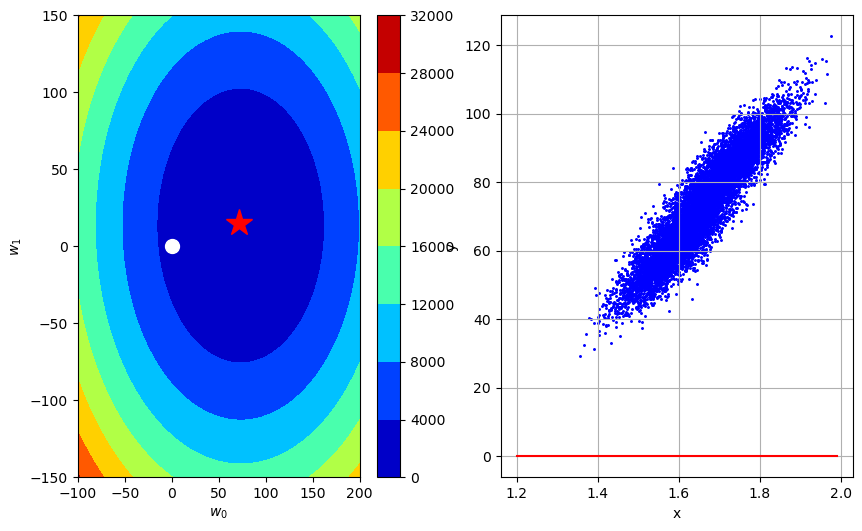

In [31]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

# 5. Effect of Outliers and MAE Cost Function

### With subsampling

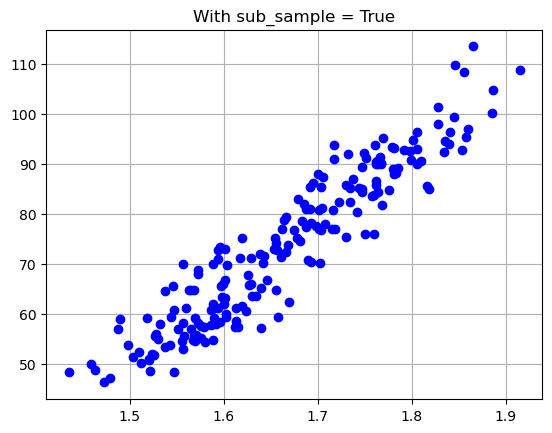

In [32]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height,weight, color='Blue',zorder=3)
plt.grid(zorder=1)
plt.title('With sub_sample = True')
plt.show()

GD iter. 0/49: loss=2829.2722244384163, w0=51.54259072181176, w1=10.132993413506084
GD iter. 1/49: loss=267.05002587794297, w0=67.0053679383553, w1=13.172891437557826
GD iter. 2/49: loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773324
GD iter. 3/49: loss=15.696028199160633, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/49: loss=13.828168216410079, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/49: loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/49: loss=13.644931152102243, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/49: loss=13.643569482174815, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/49: loss=13.643446931881352, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/49: loss=13.643435902354934, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/49: loss=13.643434909697557, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/49: loss=13.643434820358395, w0=73.6322333285226, w1=14.47569718345

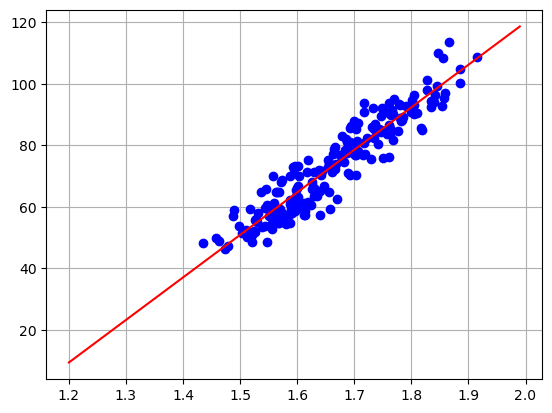

In [33]:
from plots import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

w_bar = gd_ws[-1]
x_bar , y_bar = prediction(w_bar[0], w_bar[1], mean_x, std_x)
plt.scatter(height,weight, color='Blue',zorder=2)
plt.plot(x_bar,y_bar,color='Red',zorder=3)
plt.grid(zorder=1)
plt.show()

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

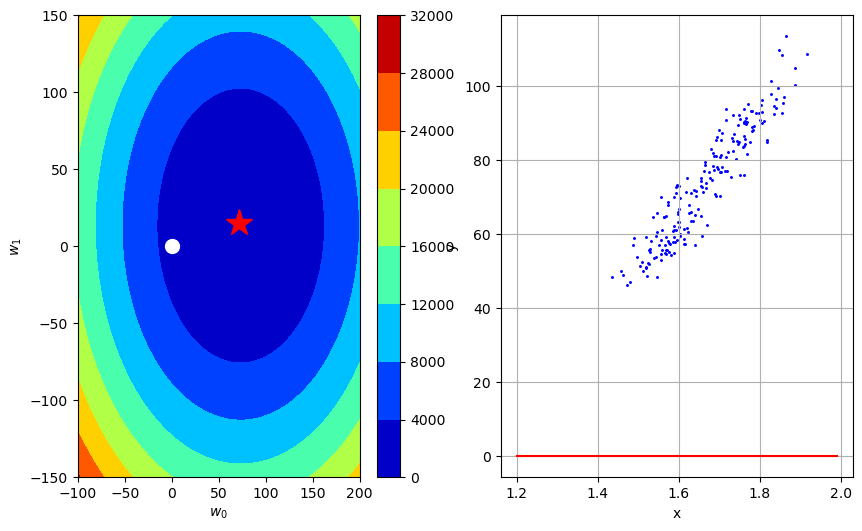

In [34]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

### With subsampling and outliners

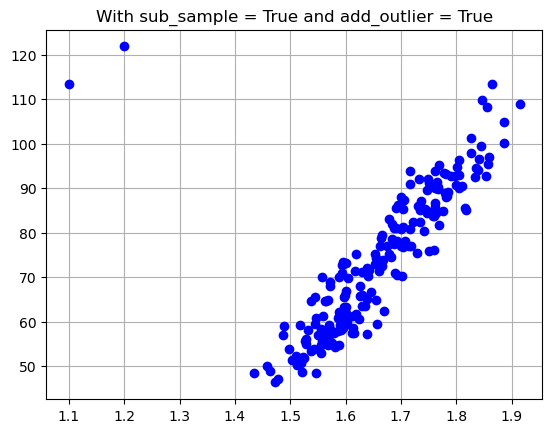

In [35]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height,weight, color='Blue',zorder=3)
plt.grid(zorder=1)
plt.title('With sub_sample = True and add_outlier = True')
plt.show()

GD iter. 0/49: loss=2869.8351145358533, w0=51.84746409844842, w1=7.7244264061924195
GD iter. 1/49: loss=318.28212470159644, w0=67.40170332798297, w1=10.041754328050114
GD iter. 2/49: loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.97477639885521, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.05160722578589, w1=11.032481534481914
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889339, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140234, w0=74.06776649225755, w1=11.034889001593541
GD

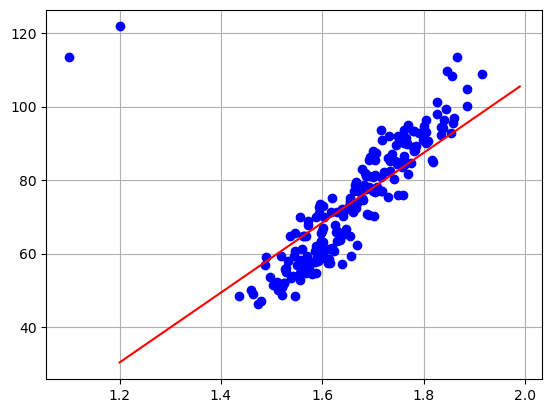

In [36]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

w_bar = gd_ws[-1]
x_bar , y_bar = prediction(w_bar[0], w_bar[1], mean_x, std_x)
plt.scatter(height,weight, color='Blue',zorder=2)
plt.plot(x_bar,y_bar,color='Red',zorder=3)
plt.grid(zorder=1)
plt.show()

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

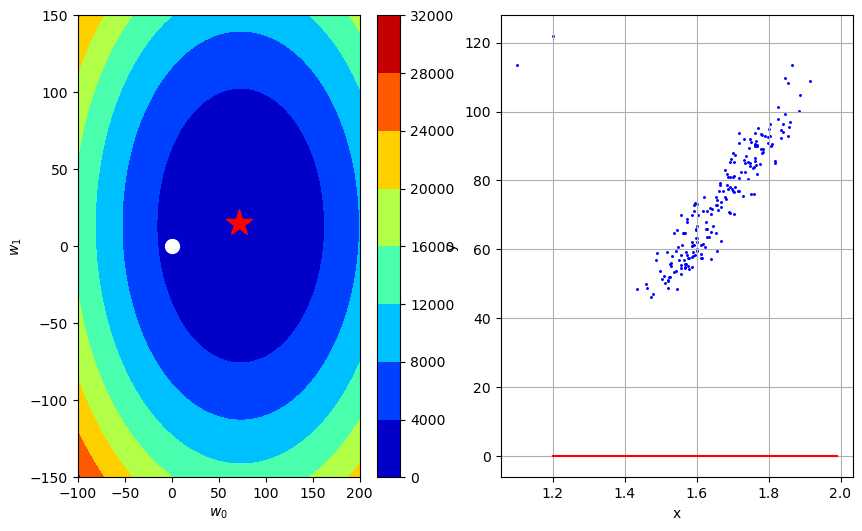

In [37]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

### Without subsampling but with outliners

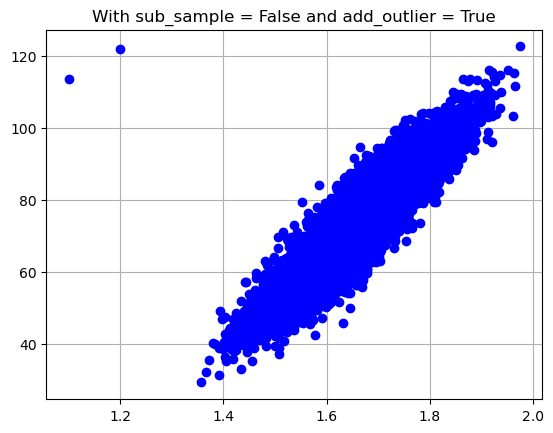

In [38]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height,weight, color='Blue',zorder=3)
plt.grid(zorder=1)
plt.title('With sub_sample = False and add_outlier = True')
plt.show()

GD iter. 0/49: loss=2793.0633249190387, w0=51.31194997183139, w1=9.375829281932639
GD iter. 1/49: loss=266.5853963287508, w0=66.70553496338117, w1=12.18857806651237
GD iter. 2/49: loss=39.20238275561809, w0=71.32361046084604, w1=13.032402701886333
GD iter. 3/49: loss=18.73791153403656, w0=72.70903311008549, w1=13.285550092498516
GD iter. 4/49: loss=16.896109124094252, w0=73.12465990485732, w1=13.361494309682167
GD iter. 5/49: loss=16.73034690719944, w0=73.24934794328887, w1=13.384277574837261
GD iter. 6/49: loss=16.715428307678906, w0=73.28675435481834, w1=13.39111255438379
GD iter. 7/49: loss=16.71408563372206, w0=73.29797627827719, w1=13.39316304824775
GD iter. 8/49: loss=16.71396479306594, w0=73.30134285531484, w1=13.393778196406936
GD iter. 9/49: loss=16.713953917406894, w0=73.30235282842614, w1=13.393962740854693
GD iter. 10/49: loss=16.713952938597576, w0=73.30265582035952, w1=13.39401810418902
GD iter. 11/49: loss=16.713952850504736, w0=73.30274671793953, w1=13.394034713189317
G

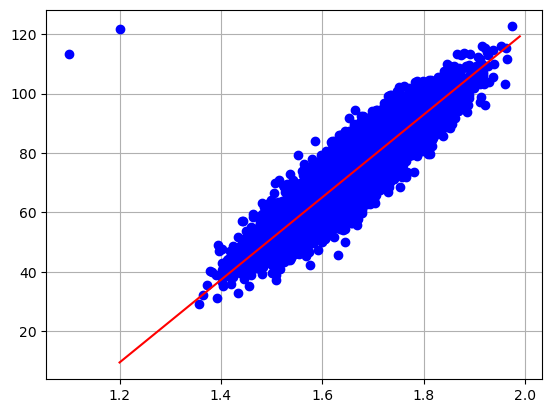

In [39]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

w_bar = gd_ws[-1]
x_bar , y_bar = prediction(w_bar[0], w_bar[1], mean_x, std_x)
plt.scatter(height,weight, color='Blue',zorder=2)
plt.plot(x_bar,y_bar,color='Red',zorder=3)
plt.grid(zorder=1)
plt.show()

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

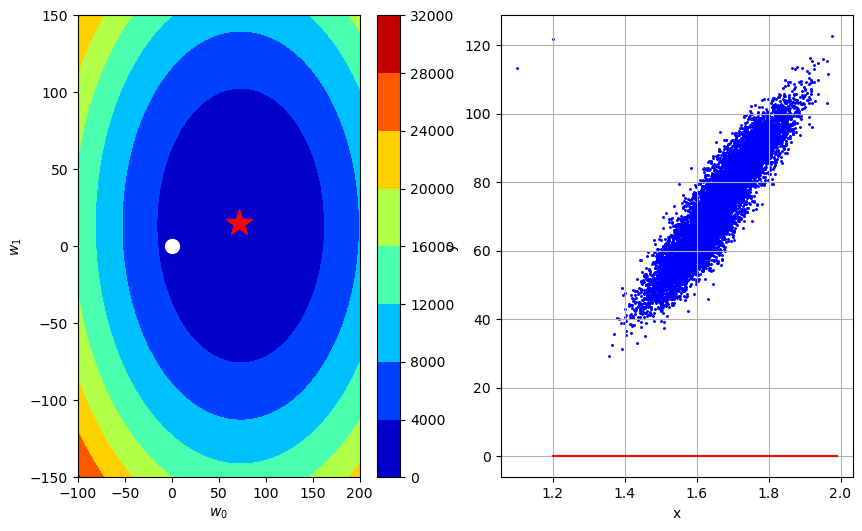

In [40]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 6. Subgradient descent

### With subsampling and outliners

In [41]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [42]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    N = len(y)
    e = y - tx @ w
    return (1/N) * ( np.sum(np.abs(e)) )

In [43]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    q = y - tx@w
    s = np.sign(q)
    nb_zeros = (s == 0).sum()
    N = len(y)
    return (-1/N)*((tx.T)@s), nb_zeros

In [44]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    diff = 0 
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        subgrad, zeros = compute_subgradient_mae(y, tx, w)

        if zeros > 0 :
            diff += 1
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w-gamma*subgrad

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    if diff>0:
        print('We encountered at least 1 non differential point !')
    else:
        print('We DID NOT encountered any non differential point !')

    return losses, ws

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=70.56780585492639, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=68.46780585492637, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=67.06780585492639, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=7.331429193108857e-15
SubGD iter. 1

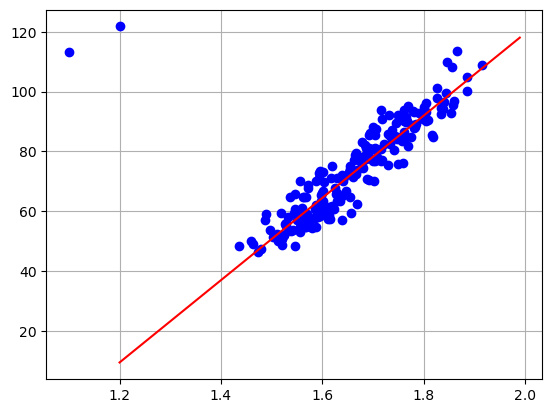

In [45]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

w_bar = subgd_ws[-1]
x_bar , y_bar = prediction(w_bar[0], w_bar[1], mean_x, std_x)
plt.scatter(height,weight, color='Blue',zorder=2)
plt.plot(x_bar,y_bar,color='Red',zorder=3)
plt.grid(zorder=1)
plt.show()

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

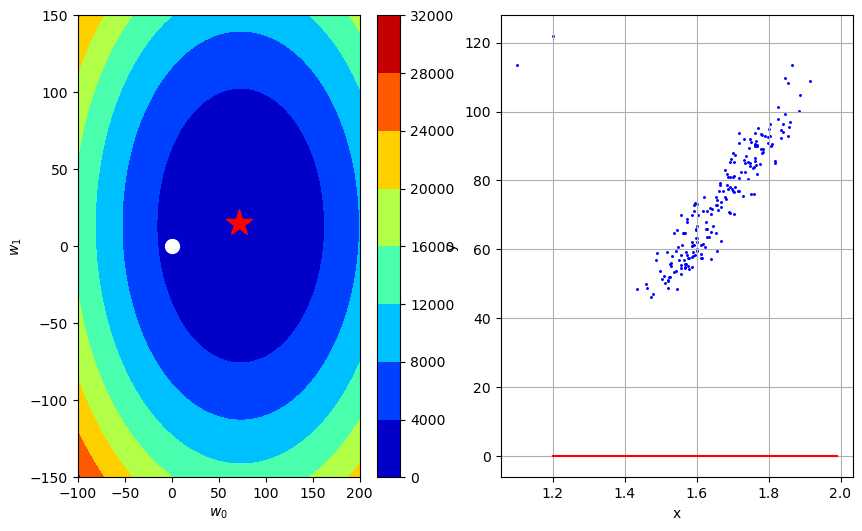

In [46]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

### Full data and without outliners

In [47]:
height, weight, gender = load_data(sub_sample=False, add_outlier=False)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

SubGD iter. 0/199: loss=73.29392200210519, w0=0.7, w1=1.5433387900998242e-15
SubGD iter. 1/199: loss=72.59392200210519, w0=1.4, w1=3.0866775801996484e-15
SubGD iter. 2/199: loss=71.89392200210517, w0=2.0999999999999996, w1=4.630016370299472e-15
SubGD iter. 3/199: loss=71.19392200210518, w0=2.8, w1=6.173355160399297e-15
SubGD iter. 4/199: loss=70.49392200210518, w0=3.5, w1=7.716693950499121e-15
SubGD iter. 5/199: loss=69.79392200210519, w0=4.2, w1=9.260032740598946e-15
SubGD iter. 6/199: loss=69.09392200210519, w0=4.9, w1=1.080337153069877e-14
SubGD iter. 7/199: loss=68.39392200210517, w0=5.6000000000000005, w1=1.2346710320798595e-14
SubGD iter. 8/199: loss=67.69392200210518, w0=6.300000000000001, w1=1.389004911089842e-14
SubGD iter. 9/199: loss=66.99392200210518, w0=7.000000000000001, w1=1.5433387900998243e-14
SubGD iter. 10/199: loss=66.29392200210518, w0=7.700000000000001, w1=1.6976726691098067e-14
SubGD iter. 11/199: loss=65.59392200210517, w0=8.4, w1=1.8520065481197892e-14
SubGD it

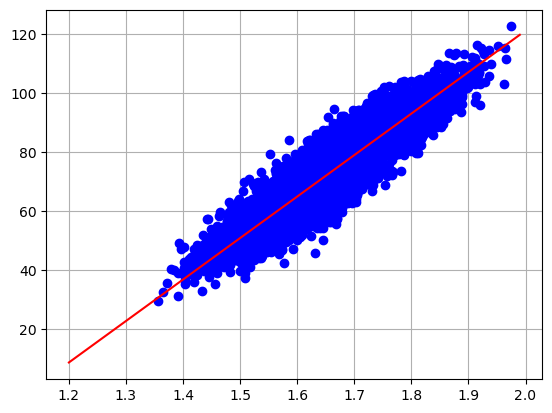

In [48]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

w_bar = subgd_ws[-1]
x_bar , y_bar = prediction(w_bar[0], w_bar[1], mean_x, std_x)
plt.scatter(height,weight, color='Blue',zorder=2)
plt.plot(x_bar,y_bar,color='Red',zorder=3)
plt.grid(zorder=1)
plt.show()

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

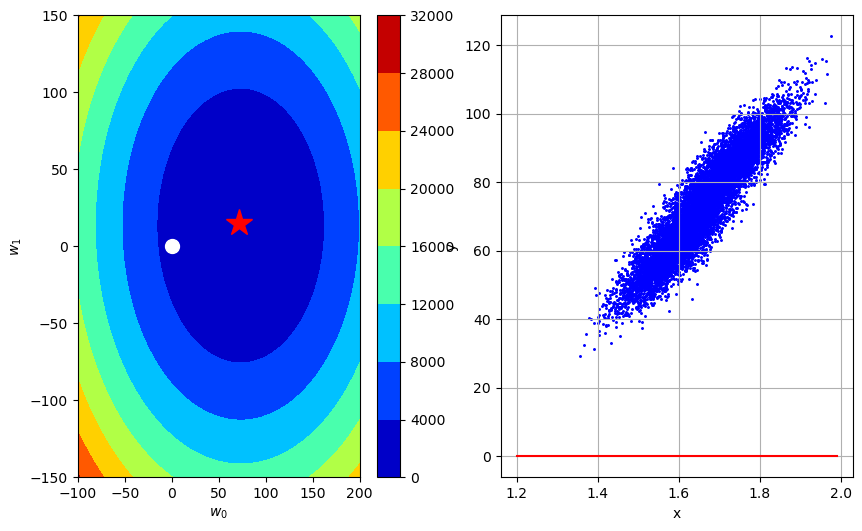

In [49]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [50]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        loss = compute_loss(y,tx,w)
        batch = batch_iter(y, tx, batch_size=batch_size, num_batches=1, shuffle=True)
        for batch_y, batch_tx in batch:
            subgrad, zeros = compute_subgradient_mae(batch_y, batch_tx, w)
        w = w - gamma * subgrad

        ws.append(w)
        losses.append(loss)


        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

SubSGD iter. 0/499: loss=73.29392200210519, w0=0.7, w1=0.556468276429123
SubSGD iter. 1/499: loss=72.59392200210517, w0=1.4, w1=0.7166998594113799
SubSGD iter. 2/499: loss=71.89392200210516, w0=2.0999999999999996, w1=1.120943123985558
SubSGD iter. 3/499: loss=71.19392200210517, w0=2.8, w1=1.180176089961636
SubSGD iter. 4/499: loss=70.49392200210518, w0=3.5, w1=1.198039720556449
SubSGD iter. 5/499: loss=69.79392200210518, w0=4.2, w1=-0.4761587962562388
SubSGD iter. 6/499: loss=69.09392200210519, w0=4.9, w1=0.44813387465617605
SubSGD iter. 7/499: loss=68.39392200210519, w0=5.6000000000000005, w1=0.7260019452739108
SubSGD iter. 8/499: loss=67.69392200210517, w0=6.300000000000001, w1=-0.49700997106484435
SubSGD iter. 9/499: loss=66.99392200210518, w0=7.000000000000001, w1=-0.0015755890060533684
SubSGD iter. 10/499: loss=66.29392200210519, w0=7.700000000000001, w1=-0.1337970612291373
SubSGD iter. 11/499: loss=65.59392200210516, w0=8.4, w1=-0.9644001689030283
SubSGD iter. 12/499: loss=64.893

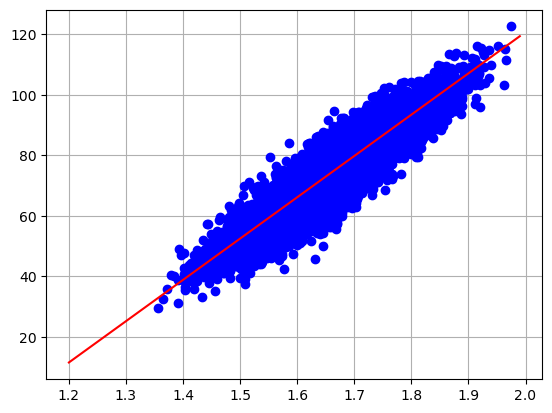

In [51]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

w_bar = subsgd_ws[-1]
x_bar , y_bar = prediction(w_bar[0], w_bar[1], mean_x, std_x)
plt.scatter(height,weight, color='Blue',zorder=2)
plt.plot(x_bar,y_bar,color='Red',zorder=3)
plt.grid(zorder=1)
plt.show()

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

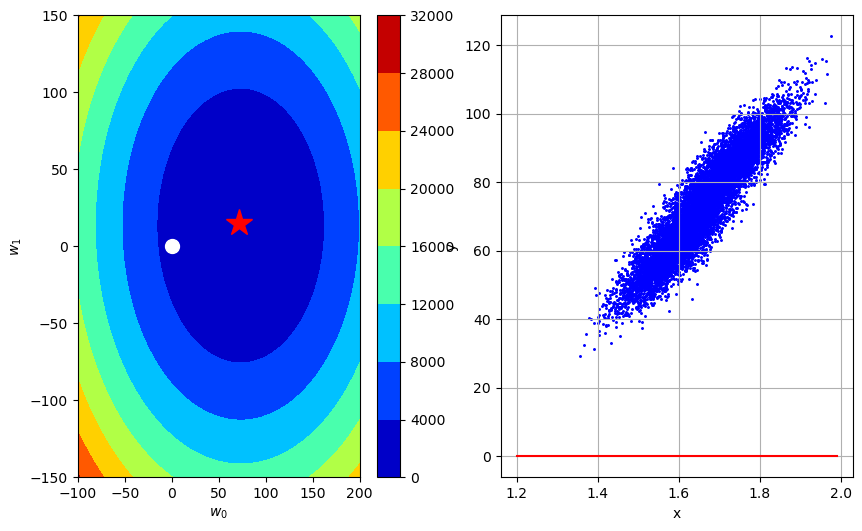

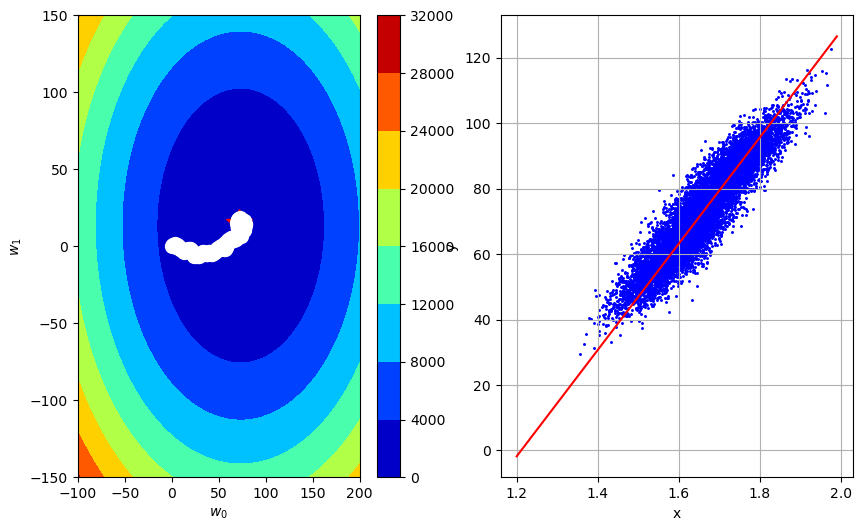

In [52]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))